In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
array_dict = np.load('realPredictedLayers.npy').item()
array_dict

{'TestingPredictedLayer': array([-1., -1., -1., ..., 48.,  3., 28.]),
 'TestingRealLayer': array([ 6., 33., 22., ..., 47.,  3., 21.]),
 'TestingUniqueZLayer': array([7., 2., 6., ..., 3., 4., 8.]),
 'TrainingPredictedLayer': array([-1., -1., -1., ...,  2., 30., 56.]),
 'TrainingRealLayer': array([56., 47.,  9., ...,  2., 30., 56.]),
 'TrainingUniqueZLayer': array([ 3.,  2., 10., ...,  3.,  7.,  3.])}

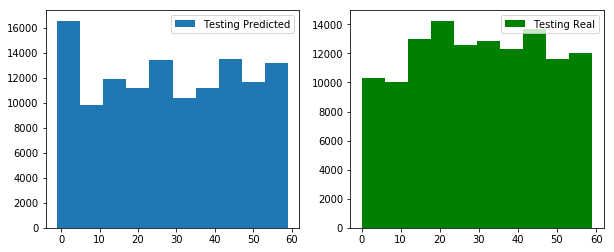

In [4]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (10, 4))
ax1.hist(array_dict['TestingPredictedLayer'], label = 'Testing Predicted')
ax2.hist(array_dict['TestingRealLayer'], label = 'Testing Real', color = 'g')
ax1.legend()
ax2.legend();

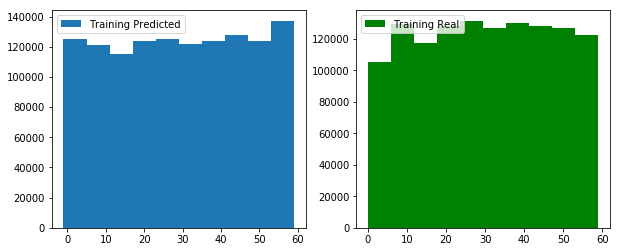

In [5]:
fig2, [ax3, ax4] = plt.subplots(1, 2, figsize = (10, 4))
ax3.hist(array_dict['TrainingPredictedLayer'], label = 'Training Predicted')
ax4.hist(array_dict['TrainingRealLayer'], label = 'Training Real', color = 'g')
ax3.legend()
ax4.legend();

In [6]:
# unique_train, count_train = np.unique(array_dict['TrainingPredictedLayer'], return_counts = True)
# print(np.array(list(zip(unique_train, count_train))))

# unique_test, count_test = np.unique(array_dict['TestingPredictedLayer'], return_counts = True)
# print(np.array(list(zip(unique_test, count_test))))

wrong_train = array_dict['TrainingPredictedLayer'][array_dict['TrainingPredictedLayer'] != array_dict['TrainingRealLayer']]
wrong_test = array_dict['TestingPredictedLayer'][array_dict['TestingPredictedLayer'] != array_dict['TestingRealLayer']]

print(len(wrong_train), len(wrong_test))

84888 58610


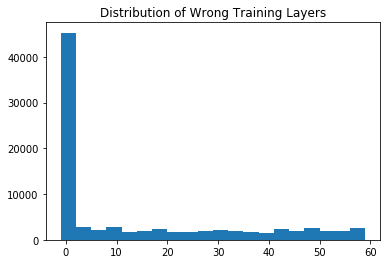

In [7]:
plt.hist(wrong_train, bins=20)
plt.title('Distribution of Wrong Training Layers');

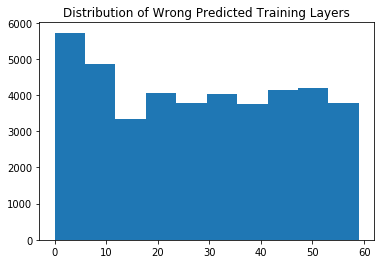

In [19]:
plt.hist(wrong_train[wrong_train != -1])
plt.title('Distribution of Wrong Predicted Training Layers');

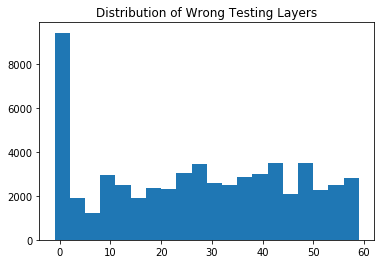

In [8]:
plt.hist(wrong_test, bins=20)
plt.title('Distribution of Wrong Testing Layers');

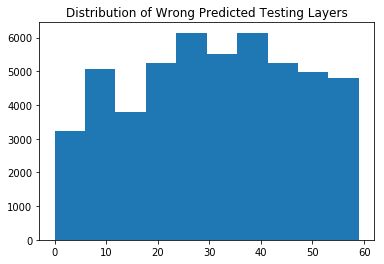

In [21]:
plt.hist(wrong_test[wrong_test != -1])
plt.title('Distribution of Wrong Predicted Testing Layers');

In [9]:
train_layers = array_dict['TrainingUniqueZLayer']
test_layers = array_dict['TestingUniqueZLayer']

print(np.unique(train_layers, return_counts=True))
print(np.unique(test_layers, return_counts=True))

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 36., 37., 38., 42.]), array([293454, 179744, 139466, 118779,  92338,  72610,  62335,  51375,
        40004,  31373,  28496,  24112,  19043,  14659,  16166,  10823,
         9453,   8631,   7535,   4247,   3973,   3151,   3014,   2603,
         1644,   1233,   1644,   1096,    548,    274,    274,    274,
          137,    137,    137,    137,    137]))
(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 33.]), array([27948, 19454, 11645, 13152,  7809,  7261,  5206,  3836,  4658,
        4110,  2192,  3151,  2877,  1918,  1781,  1644,   685,   274,
         548,   548,   411,   274,   274,   137,   137,   137,   137,
         274,   137,   137]))


In [10]:
def return_train_acc(layers):
    result = 0
    count = 0
    length = len(array_dict['TrainingUniqueZLayer'])
    for i in range(length - 1):
        if array_dict['TrainingUniqueZLayer'][i] == num:
            count += 1
            if array_dict['TrainingPredictedLayer'][i] == array_dict['TrainingRealLayer'][i]:
                result += 1
    return result/count

def return_test_acc(layers):
    result = 0
    count = 0
    length = len(array_dict['TestingUniqueZLayer'])
    for i in range(length - 1):
        if array_dict['TestingUniqueZLayer'][i] == num:
            count += 1
            if array_dict['TestingPredictedLayer'][i] == array_dict['TestingRealLayer'][i]:
                result += 1
    return result/count

train_x = []
test_x = []
train_acc = []
test_acc = []

for num in np.unique(train_layers):
    train = return_train_acc(num)
    train_x.append(num)
    train_acc.append(train)

for num in np.unique(test_layers):
    test = return_test_acc(num)
    test_x.append(num)
    test_acc.append(test)

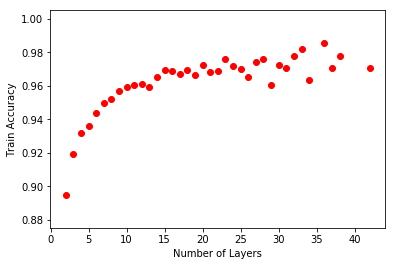

In [11]:
plt.scatter(train_x, train_acc, color = 'r')
plt.xlabel('Number of Layers')
plt.ylabel('Train Accuracy');

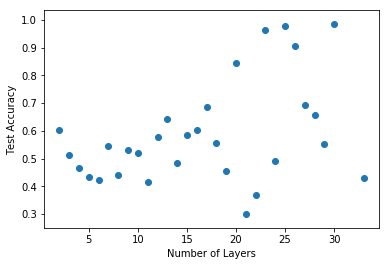

In [17]:
plt.scatter(test_x, test_acc)
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy');